In [21]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict

In [22]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    
    sr: float
    bpb: float
    boundary_percent: float
    summary : str
    
    

In [23]:
def get_sr(state : BatsmanState):
    runs = state['runs']
    balls = state['balls']
    
    sr = (runs / balls) * 100
    
    return {'sr' : sr}
    

In [24]:
def get_summary(state : BatsmanState):
    summary = f"""
    Strike Rate - {state['sr']} \n
    Balls per boundary {state['bpb']} \n
    Boundary percent {state['boundary_percent']}
    """
    
    return {'summary' : summary}


In [25]:
def get_bpb(state: BatsmanState):
    bpb = state['balls']/(state['fours'] + state['sixes'])
    
    return {'bpb' : bpb}


In [26]:
def get_boundary_percent(state : BatsmanState):
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6))/state['runs'])*100
   
    return {'boundary_percent' : boundary_percent}


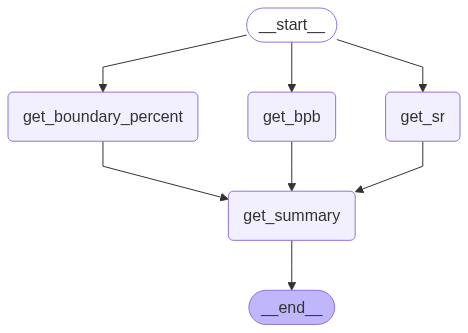

In [27]:
graph = StateGraph(BatsmanState)

graph.add_node('get_sr', get_sr)
graph.add_node('get_bpb', get_bpb)
graph.add_node('get_boundary_percent', get_boundary_percent)
graph.add_node('get_summary', get_summary)

graph.add_edge(START, 'get_sr')
graph.add_edge(START, 'get_bpb')
graph.add_edge(START, 'get_boundary_percent')

graph.add_edge('get_sr', 'get_summary')
graph.add_edge('get_bpb', 'get_summary')
graph.add_edge('get_boundary_percent', 'get_summary')

graph.add_edge('get_summary', END)


workflow = graph.compile()
workflow


In [28]:
initial_state = {
    'runs' : 100,
    'balls' : 50,
    'fours' : 6,
    'sixes' : 4
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'boundary_percent': 48.0, 'summary': '\n    Strike Rate - 200.0 \n\n    Balls per boundary 5.0 \n\n    Boundary percent 48.0\n    '}
